In [30]:
import pathlib
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

In [48]:
validation_path = pathlib.Path("/work/scratch-nopw2/wkjones/validation_v1.8.1/")
files = sorted(list(validation_path.glob("validation_dccs_S2019*_120000_E*_120000_X0000_2500_Y0000_1500.nc")))
print(len(files))

361


In [49]:
flash2core = []
flash2anvil = []
flash2core_with_anvil = []
flash2anvil_with_core = []
flash2marker = []

core2flash = []
anvil2flash = []
core_with_anvil2flash = []
anvil_with_core2flash = []
marker2flash = []

for f in files:
    print(f, end='\r')
    
    with xr.open_dataset(f) as ds:
        flash2core.append(ds.flash_core_distance.values)
        flash2anvil.append(ds.flash_anvil_distance.values)
        flash2core_with_anvil.append(ds.flash_core_with_anvil_distance.values)
        flash2anvil_with_core.append(ds.flash_anvil_with_core_distance.values)
        flash2marker.append(ds.flash_anvil_marker_distance.values)
        
        core2flash.append(ds.core_glm_distance.values[ds.core_margin_flag.values])
        anvil2flash.append(ds.anvil_glm_distance.values[ds.anvil_margin_flag.values])
        core_with_anvil2flash.append(ds.core_with_anvil_glm_distance.values[ds.core_with_anvil_margin_flag.values])
        anvil_with_core2flash.append(ds.anvil_with_core_glm_distance.values[ds.anvil_with_core_margin_flag.values])
        marker2flash.append(ds.anvil_marker_glm_distance.values[ds.anvil_marker_margin_flag.values])
        
flash2core = np.concatenate(flash2core)
flash2anvil = np.concatenate(flash2anvil)
flash2core_with_anvil = np.concatenate(flash2core_with_anvil)
flash2anvil_with_core = np.concatenate(flash2anvil_with_core)
flash2marker = np.concatenate(flash2marker)

core2flash = np.concatenate(core2flash)
anvil2flash = np.concatenate(anvil2flash)
core_with_anvil2flash = np.concatenate(core_with_anvil2flash)
anvil_with_core2flash = np.concatenate(anvil_with_core2flash)
marker2flash = np.concatenate(marker2flash)

n_glm = flash2core.size
n_core = core2flash.size
n_anvil = anvil2flash.size
n_core_with_anvil = core_with_anvil2flash.size
n_anvil_with_core = anvil_with_core2flash.size
n_marker = marker2flash.size

In [50]:
core_with_anvil2flash

array([ 327.04282, 1677.3431 ,  159.53056, ...,  241.58849,  332.54324,
        362.4983 ], dtype=float32)

In [51]:
# print(n_glm, n_core, n_wvd, n_anvil)
print(n_glm, n_core, n_core_with_anvil, n_marker, n_anvil, n_anvil_with_core)

116343048 733608 574237 763954 250105 136779


In [52]:
margin=15

core_pod = np.sum(flash2core<=margin)/flash2core.size
core_with_anvil_pod = np.sum(flash2core_with_anvil<=margin)/flash2core_with_anvil.size
marker_pod = np.sum(flash2marker<=margin)/flash2marker.size
anvil_pod = np.sum(flash2anvil<=margin)/flash2anvil.size
anvil_with_core_pod = np.sum(flash2anvil_with_core<=margin)/flash2anvil_with_core.size
print("core pod:", np.round(core_pod,4), 
      "core + anvil pod:", np.round(core_with_anvil_pod,4), 
      "marker pod:", np.round(marker_pod,4),
      "anvil pod:", np.round(anvil_pod,4),
      "anvil + core pod:", np.round(anvil_with_core_pod,4),)

core_far = np.sum(core2flash>margin)/n_core
anvil_far = np.sum(anvil2flash>margin)/n_anvil
marker_far = np.sum(marker2flash>margin)/n_marker
core_with_anvil_far = np.sum(core_with_anvil2flash>margin)/n_core_with_anvil
anvil_with_core_far = np.sum(anvil_with_core2flash>margin)/n_anvil_with_core

print("core far:", np.round(core_far,4), 
      "core + anvil far:", np.round(core_with_anvil_far,4), 
      "marker far:", np.round(marker_far,4),
      "anvil far", np.round(anvil_far,4), 
      "anvil + core far", np.round(anvil_with_core_far,4), )

core_f1 = 2*core_pod*(1-core_far)/(core_pod+1-core_far)
anvil_f1 = 2*anvil_pod*(1-anvil_far)/(anvil_pod+1-anvil_far)
marker_f1 = 2*marker_pod*(1-marker_far)/(marker_pod+1-marker_far)
core_with_anvil_f1 = 2*core_with_anvil_pod*(1-core_with_anvil_far)/(core_with_anvil_pod+1-core_with_anvil_far)
anvil_with_core_f1 = 2*anvil_with_core_pod*(1-anvil_with_core_far)/(anvil_with_core_pod+1-anvil_with_core_far)

print("core f1:", np.round(core_f1,4), 
      "core + anvil f1:", np.round(core_with_anvil_f1,4), 
      "marker f1:", np.round(marker_f1,4),
      "anvil f1:", np.round(anvil_f1,4),
      "anvil + core f1:", np.round(anvil_with_core_f1,4))

core pod: 0.3666 core + anvil pod: 0.3597 marker pod: 0.9668 anvil pod: 0.9822 anvil + core pod: 0.9763
core far: 0.3 core + anvil far: 0.2387 marker far: 0.7063 anvil far 0.3706 anvil + core far 0.1759
core f1: 0.4812 core + anvil f1: 0.4886 marker f1: 0.4506 anvil f1: 0.7671 anvil + core f1: 0.8937


In [53]:
validation_ds = xr.Dataset(
    data_vars=dict(
        flash_core_distance=(('flash',), flash2core), 
        flash_anvil_distance=(('flash',), flash2anvil), 
        flash_core_with_anvil_distance=(('flash',), flash2core_with_anvil), 
        flash_anvil_with_core_distance=(('flash',), flash2anvil_with_core), 
        flash_marker_distance=(('flash',), flash2marker), 
        
        core_flash_distance=(('core',), core2flash), 
        anvil_flash_distance=(('anvil',), anvil2flash), 
        core_with_anvil_flash_distance=(('core_with_anvil',), core_with_anvil2flash), 
        anvil_with_core_flash_distance=(('anvil_with_core',), anvil_with_core2flash), 
        marker_flash_distance=(('marker',), marker2flash), 
        
        core_pod=(tuple(), core_pod), 
        anvil_pod=(tuple(), anvil_pod), 
        core_with_anvil_pod=(tuple(), core_with_anvil_pod), 
        anvil_with_core_pod=(tuple(), anvil_with_core_pod), 
        marker_pod=(tuple(), marker_pod), 
        
        core_far=(tuple(), core_far), 
        anvil_far=(tuple(), anvil_far), 
        core_with_anvil_far=(tuple(), core_with_anvil_far), 
        anvil_with_core_far=(tuple(), anvil_with_core_far), 
        marker_far=(tuple(), marker_far), 
        
        core_f1=(tuple(), core_f1), 
        anvil_f1=(tuple(), anvil_f1), 
        core_with_anvil_f1=(tuple(), core_with_anvil_f1), 
        anvil_with_core_f1=(tuple(), anvil_with_core_f1), 
        marker_f1=(tuple(), marker_f1), 
        
        n_glm=(tuple(), n_glm), 
        n_core=(tuple(), n_core), 
        n_anvil=(tuple(), n_anvil), 
        n_core_with_anvil=(tuple(), n_core_with_anvil), 
        n_anvil_with_core=(tuple(), n_anvil_with_core), 
        n_marker=(tuple(), n_marker), 
        )
    )
# validation_ds.to_netcdf('./data/validation_data.nc')

In [54]:
core_pod_hist = np.histogram(validation_ds.flash_core_distance, bins=40, range=[0,40])[0] / validation_ds.n_glm.data
anvil_pod_hist = np.histogram(validation_ds.flash_anvil_distance, bins=40, range=[0,40])[0] / validation_ds.n_glm.data
core_with_anvil_pod_hist = np.histogram(validation_ds.flash_core_with_anvil_distance, bins=40, range=[0,40])[0] / validation_ds.n_glm.data
anvil_with_core_pod_hist = np.histogram(validation_ds.flash_anvil_with_core_distance, bins=40, range=[0,40])[0] / validation_ds.n_glm.data
marker_pod_hist = np.histogram(validation_ds.flash_marker_distance, bins=40, range=[0,40])[0] / validation_ds.n_glm.data

core_far_hist = np.histogram(validation_ds.core_flash_distance, bins=40, range=[0,40])[0] / validation_ds.n_core.data
anvil_far_hist = np.histogram(validation_ds.anvil_flash_distance, bins=40, range=[0,40])[0] / validation_ds.n_anvil.data
core_with_anvil_far_hist = np.histogram(validation_ds.core_with_anvil_flash_distance, bins=40, range=[0,40])[0] / validation_ds.n_core_with_anvil.data
anvil_with_core_far_hist = np.histogram(validation_ds.anvil_with_core_flash_distance, bins=40, range=[0,40])[0] / validation_ds.n_anvil_with_core.data
marker_far_hist = np.histogram(validation_ds.marker_flash_distance, bins=40, range=[0,40])[0] / validation_ds.n_marker.data


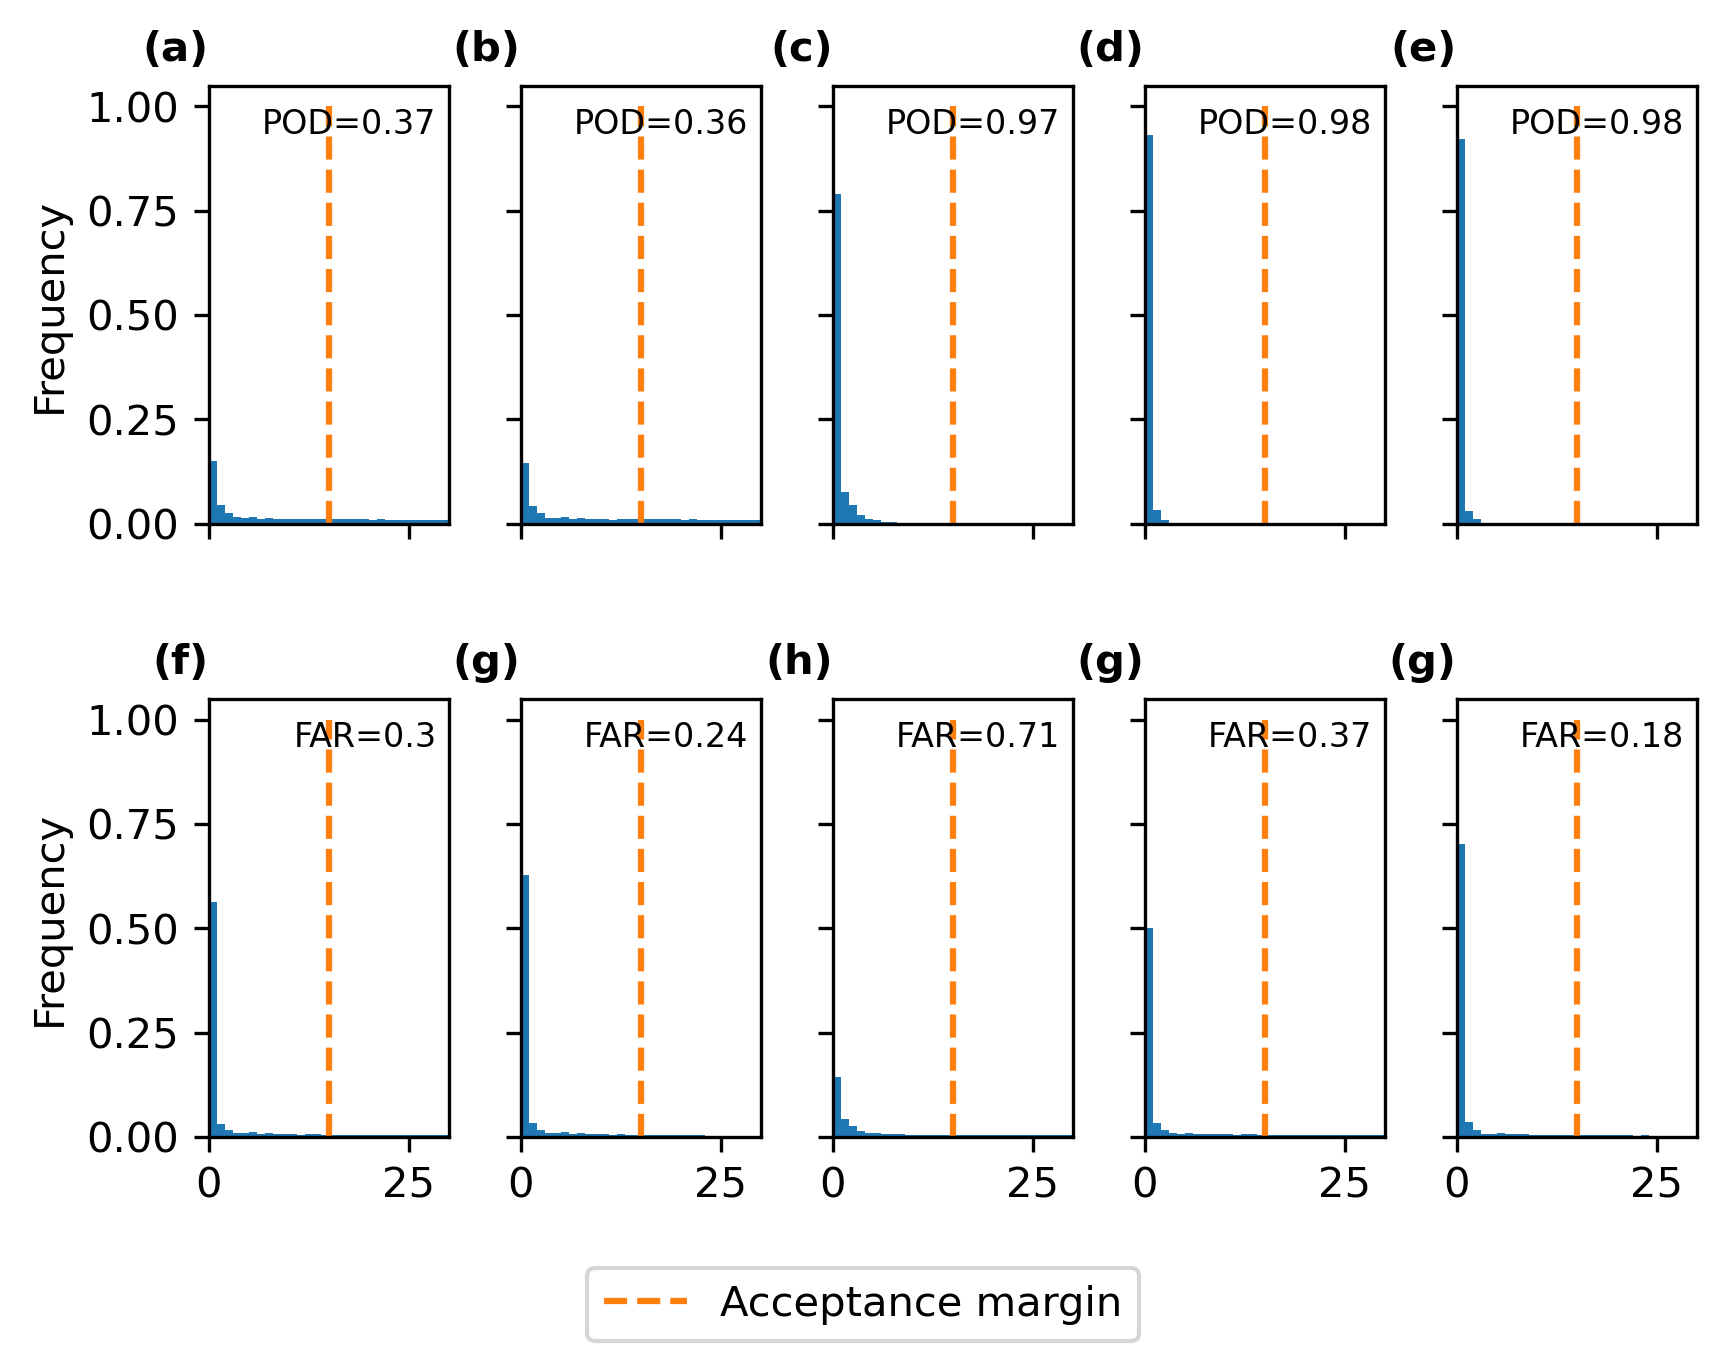

In [55]:
acceptance_margin = 15
xlim = [0,acceptance_margin*2]
ylim = [0,1.05]

fig, ax = plt.subplots(2, 5, dpi=300, sharex=True, sharey=True)

ax[0,0].bar(np.arange(0,40), core_pod_hist, width=1, align='edge')
ax[0,0].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[0,0].set_title('(a)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_ylim(ylim)
ax[0,0].set_xlim(xlim)
ax[0,0].text(xlim[1]*0.95, ylim[1]*0.95,f'POD={np.round(validation_ds.core_pod.data,2)}', ha='right', va='top',fontsize=8)

ax[0,1].bar(np.arange(0,40), core_with_anvil_pod_hist, width=1, align='edge')
ax[0,1].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[0,1].set_title('(b)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[0,1].text(xlim[1]*0.95, ylim[1]*0.95,f'POD={np.round(validation_ds.core_with_anvil_pod.data,2)}', ha='right', va='top',fontsize=8)

ax[0,2].bar(np.arange(0,40), marker_pod_hist, width=1, align='edge')
ax[0,2].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[0,2].set_title('(c)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[0,2].text(xlim[1]*0.95, ylim[1]*0.95,f'POD={np.round(validation_ds.marker_pod.data,2)}', ha='right', va='top',fontsize=8)

ax[0,3].bar(np.arange(0,40), anvil_pod_hist, width=1, align='edge')
ax[0,3].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[0,3].set_title('(d)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[0,3].text(xlim[1]*0.95, ylim[1]*0.95,f'POD={np.round(validation_ds.anvil_pod.data,2)}', ha='right', va='top',fontsize=8)

ax[0,4].bar(np.arange(0,40), anvil_with_core_pod_hist, width=1, align='edge')
ax[0,4].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[0,4].set_title('(e)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[0,4].text(xlim[1]*0.95, ylim[1]*0.95,f'POD={np.round(validation_ds.anvil_with_core_pod.data,2)}', ha='right', va='top',fontsize=8)

ax[1,0].bar(np.arange(0,40), core_far_hist, width=1, align='edge')
ax[1,0].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[1,0].set_title('(f)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[1,0].set_ylabel('Frequency')
ax[1,0].text(xlim[1]*0.95, ylim[1]*0.95,f'FAR={np.round(validation_ds.core_far.data,2)}', ha='right', va='top',fontsize=8)

ax[1,1].bar(np.arange(0,40), core_with_anvil_far_hist, width=1, align='edge')
ax[1,1].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[1,1].set_title('(g)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[1,1].text(xlim[1]*0.95, ylim[1]*0.95,f'FAR={np.round(validation_ds.core_with_anvil_far.data,2)}', ha='right', va='top',fontsize=8)

ax[1,2].bar(np.arange(0,40), marker_far_hist, width=1, align='edge')
ax[1,2].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[1,2].set_title('(h)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[1,2].text(xlim[1]*0.95, ylim[1]*0.95,f'FAR={np.round(validation_ds.marker_far.data,2)}', ha='right', va='top',fontsize=8)

ax[1,3].bar(np.arange(0,40), anvil_far_hist, width=1, align='edge')
ax[1,3].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[1,3].set_title('(g)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[1,3].text(xlim[1]*0.95, ylim[1]*0.95,f'FAR={np.round(validation_ds.anvil_far.data,2)}', ha='right', va='top',fontsize=8)

ax[1,4].bar(np.arange(0,40), anvil_with_core_far_hist, width=1, align='edge')
ax[1,4].plot([acceptance_margin,acceptance_margin],[0,1],c='C01',linestyle='--')
ax[1,4].set_title('(g)', loc='left', ha="right", fontsize=10, fontweight="bold")
ax[1,4].text(xlim[1]*0.95, ylim[1]*0.95,f'FAR={np.round(validation_ds.anvil_with_core_far.data,2)}', ha='right', va='top',fontsize=8)

import matplotlib.lines as mlines
fig.legend([mlines.Line2D([], [], color='C01', linestyle='--')], 
           ['Acceptance margin'], loc='lower center')

# fig.text(0.235, 0.95, 'Core only', ha='center', va='baseline')
# fig.text(0.515, 0.95, 'Anvil only', ha='center', va='baseline')
# fig.text(0.785, 0.95, 'Core and Anvil', ha='center', va='baseline')


plt.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.15)


